1. Импорт библиотек.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Получите и визуализируйте статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).**

2. Считываем dataset.

In [105]:
data = pd.read_csv("Student_Performance.csv")
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


3. Делаем кодирование категориальных признаков.

In [106]:
data["Extracurricular Activities"].replace({
    "Yes": 1,
    "No": 0
}, inplace=True)

4. Введём признак, который даст нам новое содержание о данных (синтетический) - Уровень мотивации студента. Чем больше студент учится часов, больше количество вопросов, отработанных на практике, и при этом, чем меньше спит, тем больше мотивация.

In [107]:
data["Motivation"] = data["Hours Studied"] + data["Sample Question Papers Practiced"] - data["Extracurricular Activities"]

5. Определение основных статистических показателей.

In [108]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
 6   Motivation                        10000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 547.0 KB
None
       Hours Studied  Previous Scores  Extracurricular Activities  \
count   10000.000000     10000.000000                10000.000000   
mean        4.992900        69.445700                    0.494800   
std         2.589309        17.343152                    0.499

6. Визуализация

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>,
        <Axes: title={'center': 'Extracurricular Activities'}>],
       [<Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Sample Question Papers Practiced'}>,
        <Axes: title={'center': 'Performance Index'}>],
       [<Axes: title={'center': 'Motivation'}>, <Axes: >, <Axes: >]],
      dtype=object)

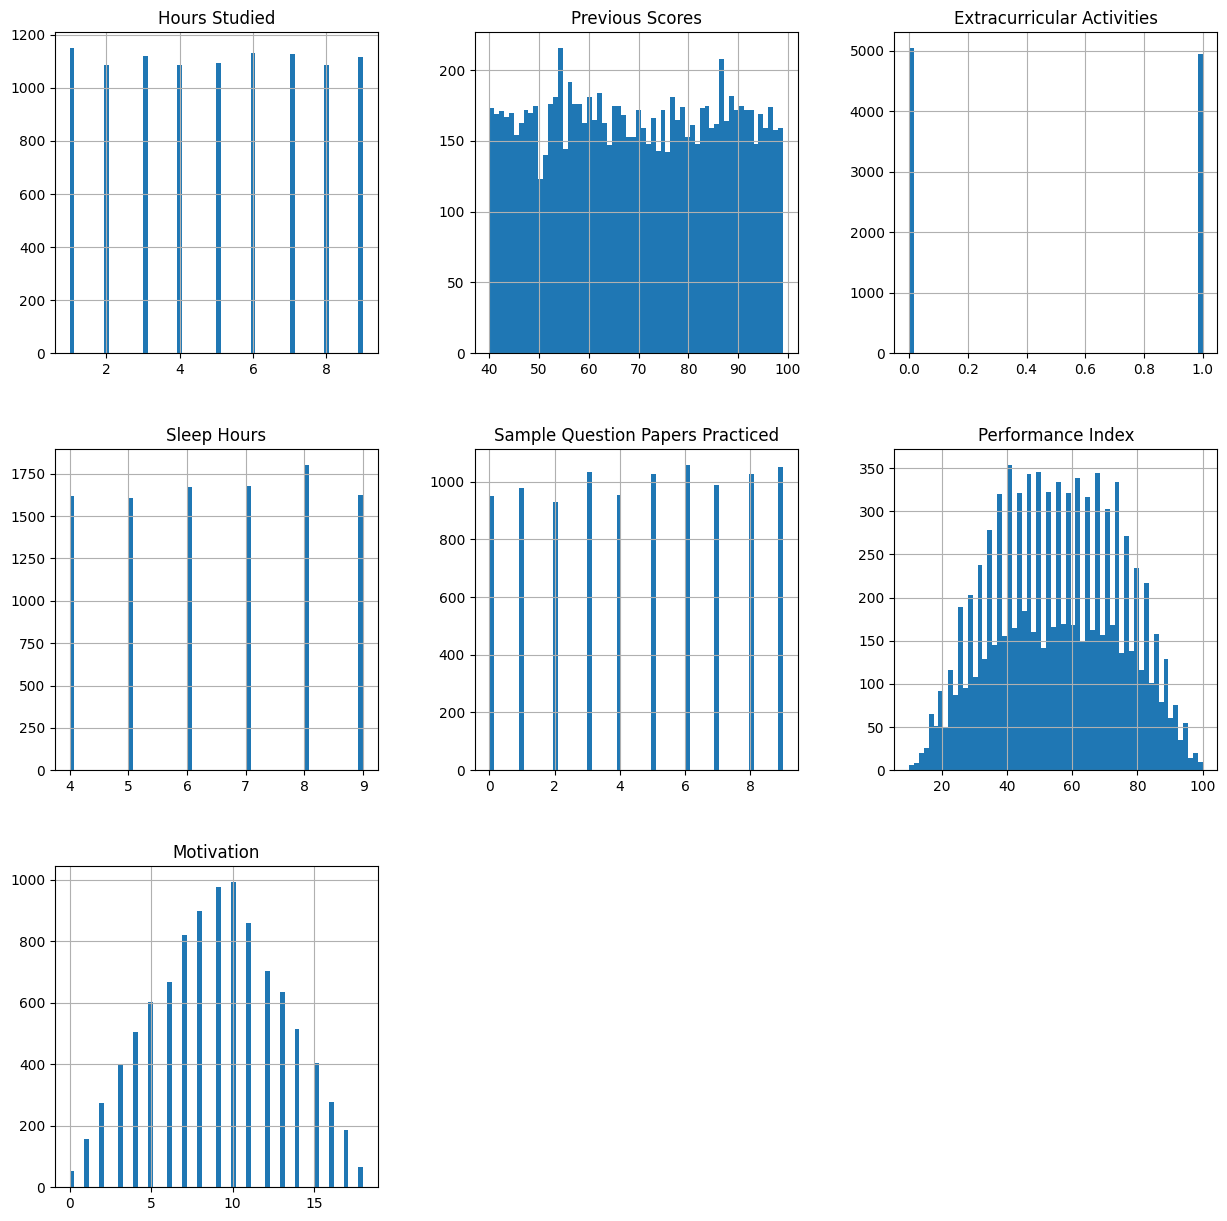

In [109]:
data.hist(bins = 60, figsize = (15, 15))

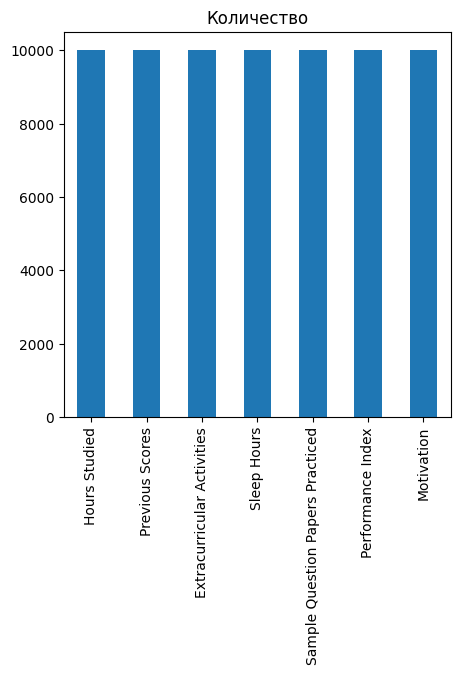

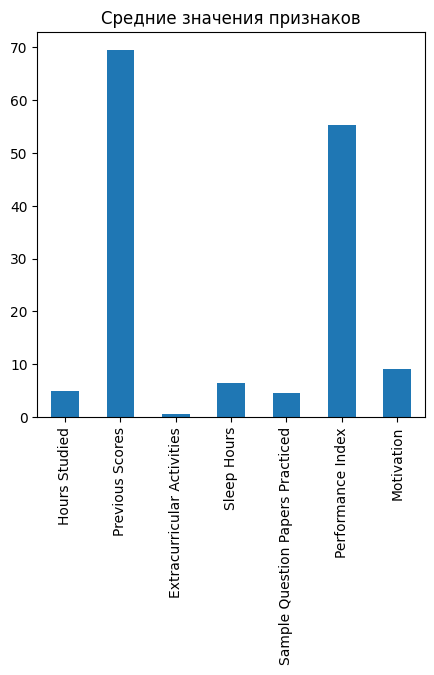

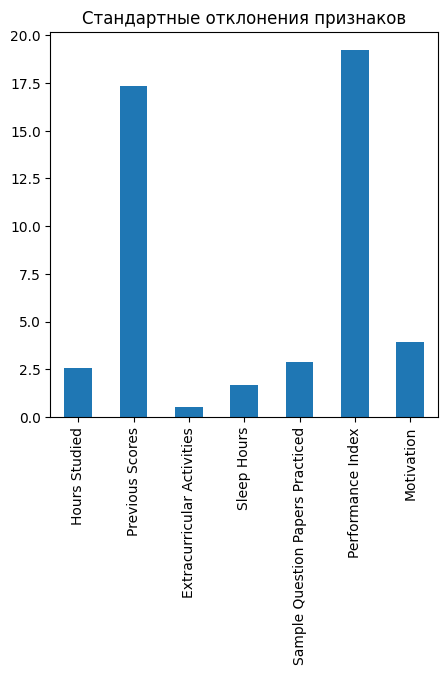

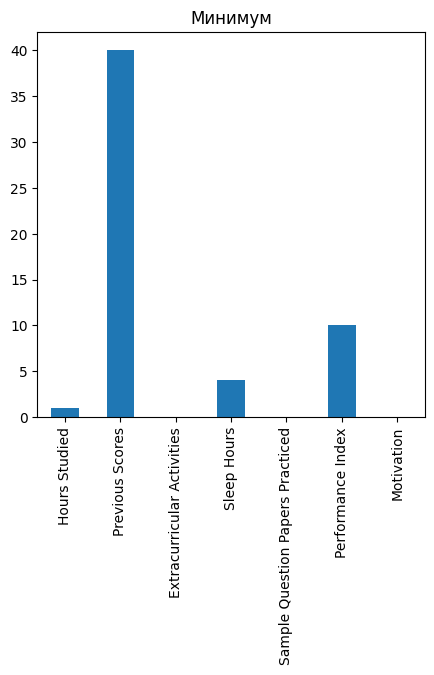

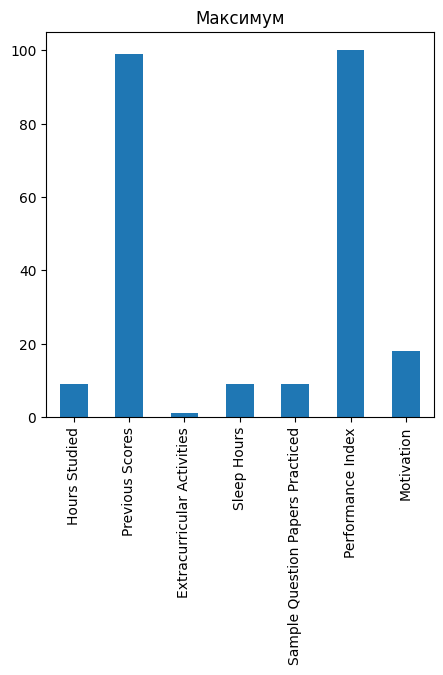

In [110]:
plt.rcParams['figure.figsize'] = [5, 5]

# Визуализация количества
data_count = data.count()
data_count.plot(kind='bar', title='Количество')
plt.show()

# Визуализация средних значений
data_means = data.mean()
data_means.plot(kind='bar', title='Средние значения признаков')
plt.show()

# Визуализация стандартных отклонений
data_std = data.std()
data_std.plot(kind='bar', title='Стандартные отклонения признаков')
plt.show()

# Визуализация минимума
data_min = data.min()
data_min.plot(kind='bar', title='Минимум')
plt.show()

# Визуализация максимума
data_max = data.max()
data_max.plot(kind='bar', title='Максимум')
plt.show()

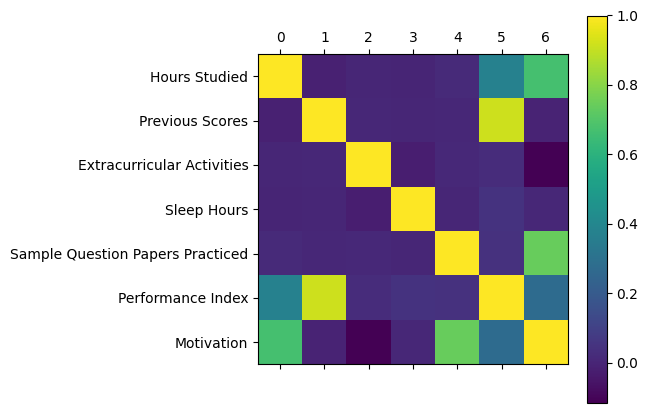

In [111]:
plt.matshow(data.corr())
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()

Здесь мы можем заметить, что выявлена корреляция целевой переменной Perfomance Index с переменными Hours Studied, Previous Scores и Motivation. Чем больше индекс производительности, тем больше мы учимся и выше баллы и мотивация.

**Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.**

In [112]:
# Нормировка данных (приведение к единому масштабу)
def standardize_data(data, excluded_columns=[]):
    standardized_data = data.copy()
    for column in data.columns:
        
        if column not in excluded_columns:
            column_min = np.min(data[column])
            column_max = np.max(data[column])
            standardized_data[column] = (data[column] - column_min) / (column_max - column_min)
            
        mean = np.mean(data[column], axis=0)

        # стандартное отклонение
        std = np.std(data[column], axis=0)

        standardized_data[column] = (data[column] - mean) / std
    return standardize_data

X = data.drop(columns=['Hours Studied'])
X = data.drop(columns=['Extracurricular Activities'])
X = data.drop(columns=['Sleep Hours'])
X = data.drop(columns=['Sample Question Papers Practiced'])



X = standardize_data(X, ['Perfomance Index,Motivation'])


**Разделите данные на обучающий и тестовый наборы данных.**

In [113]:
# Определяем зависимую переменную (целевую) и признаки
X = data.drop(columns=['Performance Index'])
y = data['Performance Index']

# Разделение на обучающий и тестовый наборы
def train_test_split_custom(X, y, test_size=0.2):
    # Вычисляем количество элементов, которые нужно выделить на тестовый набор
    test_samples = int(len(X) * test_size)
    # Получаем случайные индексы для тестового набора
    test_indices = np.random.choice(len(X), test_samples, replace=False)
    # Создаем маску для индексов, которые будут использоваться в тренировочном наборе
    train_indices = np.ones(len(X), dtype=bool)
    train_indices[test_indices] = False
    # Разделяем данные на тренировочный и тестовый наборы
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2)

**Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.**

In [114]:
def perform_linear_regression(columns, X_train, X_test, y_train, y_test):
    # Добавляем столбец с единицами для учета свободного члена
    X_train['intercept'] = 1
    X_test['intercept'] = 1


    if columns != None:
        columns = columns.split(",")
        X_train = X_train[['intercept'] + columns]
        X_test = X_test[['intercept'] + columns]


    # Преобразуем данные в массивы NumPy
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()

    def compute_linear_regression_coefficients(X, y):
        X_T = np.transpose(X)
        X_T_X = np.matmul(X_T, X)
        inv_X_T_X = np.linalg.inv(X_T_X)
        X_T_y = np.matmul(X_T, y)
        coefficients = np.matmul(inv_X_T_X, X_T_y)
        return coefficients
    
    coefficients = compute_linear_regression_coefficients(X_train, y_train)

    # Получим предсказания для тестового набора данных
    y_pred = np.dot(X_test, coefficients)

    # Оценка производительности с использованием коэффициента детерминации (R^2)
    def r2_score_custom(y_true, y_pred):
        total_variance = np.sum((y_true - np.mean(y_true))**2)
        residual_variance = np.sum((y_true - y_pred)**2)
        r2 = 1 - (residual_variance / total_variance)
        return r2

    # Вычислим R^2 для модели
    r2 = r2_score_custom(y_test, y_pred)
    sum_of_squares = np.sum(np.square(y_test - y_pred))

    return y_pred, r2, sum_of_squares

**Модель по всем признакам**

In [115]:
y_pred, r2,sum_of_squares = perform_linear_regression(None, X_train, X_test, y_train, y_test)
print('Коэффициент детерминации:', r2)
print('Предсказания:', y_pred)
print('Сумма квадратов',sum_of_squares)

Коэффициент детерминации: -3.8172144125014595
Предсказания: [91.96161242 27.21943559  8.13744344 ... -7.50849179 57.3493726
 94.36277256]
Сумма квадратов 3555879.2274721535


**Модель по Previous Scores**

In [116]:
y_pred, r2,sum_of_squares = perform_linear_regression('Previous Scores', X_train, X_test, y_train, y_test)
print('Коэффициент детерминации:', r2)
print('Предсказания:', y_pred)
print('Сумма квадратов',sum_of_squares)

Коэффициент детерминации: 0.8387304471455878
Предсказания: [73.02840211 47.63980673 37.48436857 ... 39.5154562  46.62426291
 77.09057737]
Сумма квадратов 119042.87497158468


**Модель по Hours Studied**

In [117]:
y_pred, r2,sum_of_squares = perform_linear_regression('Hours Studied', X_train, X_test, y_train, y_test)
print('Коэффициент детерминации:', r2)
print('Предсказания:', y_pred)
print('Сумма квадратов',sum_of_squares)

Коэффициент детерминации: 0.1296491972267162
Предсказания: [55.20162679 60.80975054 55.20162679 ... 63.61381241 49.59350304
 46.78944117]
Сумма квадратов 642458.9140486582


**Модель по Previous Scores и Hours Studied**

In [118]:
y_pred, r2,sum_of_squares = perform_linear_regression('Hours Studied,Previous Scores', X_train, X_test, y_train, y_test)
print('Коэффициент детерминации:', r2)
print('Предсказания:', y_pred)
print('Сумма квадратов',sum_of_squares)

Коэффициент детерминации: 0.9858286788543194
Предсказания: [73.13493174 53.38206281 37.45167148 ... 48.09347609 40.89219286
 68.61025746]
Сумма квадратов 10460.71488057256


**Модель по Previous Scores, Hours Studied и Motivation**

In [119]:
y_pred, r2,sum_of_squares = perform_linear_regression('Hours Studied,Previous Scores,Motivation', X_train, X_test, y_train, y_test)
print('Коэффициент детерминации:', r2)
print('Предсказания:', y_pred)
print('Сумма квадратов',sum_of_squares)

Коэффициент детерминации: 0.9866314091510504
Предсказания: [73.97251481 53.70007684 37.26846795 ... 48.06553797 41.23093591
 68.94968775]
Сумма квадратов 9868.170778736301


**Сравните результаты трех моделей и сделайте выводы о том, какие признаки работают лучше всего для каждой модели.**

Можно заметить, что коэффициент детерминации сильно повысился за счет Previous Scores и Hours Studied. Из этого можно сделать вывод, что успеваемость зависит от знаний студента(прошлых оценок), и от того, какое количество часов он посвящает учёбе. Таким образом, если у студента хороший багаж знаний, но он мало уделял времени учёбе, то, вероятно, успеваемость у него будет немного меньше, а если он хорошо подготовился, то будет примерно такой же балл. Также синтетический признак, который я добавил, а именно, мотивация поднимает коэффициент детерминации, следовательно, мотивация прямопропорциональна успеваемости.